In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [ ]:
#Data Loading
iris = sns.load_dataset("iris")
iris.head()
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
#Descriptive Stats
print(iris.groupby("species")["petal_length"].describe())
print(iris["species"].value_counts())

            count   mean       std  min  25%   50%    75%  max
species                                                       
setosa       50.0  1.462  0.173664  1.0  1.4  1.50  1.575  1.9
versicolor   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1
virginica    50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


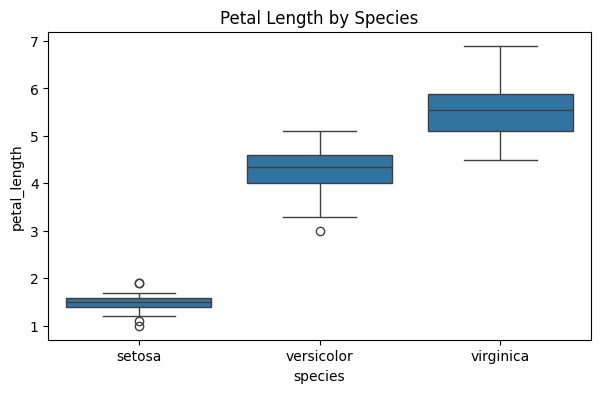

In [ ]:
#Visualization for petal length by specieis

plt.figure(figsize=(7,4))
sns.boxplot(data=iris, x="species", y="petal_length")
plt.title("Petal Length by Species")
plt.show()

#setosa, versiclor, virginica 순서로 높은 분포를 보임
#IQR또한 같은 순서대로 높은 값을 보임

In [ ]:
#Shapiro test
#H0: sample comes from a normal distribution
#H1: sample does not come from a normal distribution
for sp in iris["species"].unique():
    x = iris.loc[iris["species"] == sp, "petal_length"]
    stat, p = stats.shapiro(x)
    print(f"{sp} : W={stat:.4f}, p-value={p:.4f}")
# Setosa , versicolor, virginica에 대한 p값은 각각 0.0548 , 0.1585, 0.1098 
# 따라서 Setosa만이 정규분포를 따르는 것으로 해석 가능

setosa : W=0.9550, p-value=0.0548
versicolor : W=0.9660, p-value=0.1585
virginica : W=0.9622, p-value=0.1098


In [ ]:
#Levene test
#H0: all groups have equal variances
#H1: at least one group has different variance
groups = [
    iris.loc[iris["species"] == sp, "petal_length"]
    for sp in iris["species"].unique()
]
stat, p = stats.levene(*groups)
print(f"Levene stat={stat:.4f}, p-value={p:.10f}")
# p값이 0.0000000313로 0.05보다 현저히 작기 때문에 species간 등분산성이 없다고 볼 수 있다.

Levene stat=19.4803, p-value=0.0000000313


In [ ]:
#Hypothesis for ANOVA

#H0: 세 species 간 petal_length 평균은 동일하다.
#H1: 적어도 한 species의 petal_length 평균은 다르다.

In [ ]:
#One way ANOVA

f_stat, p_value = stats.f_oneway(*groups)
print(f"F-statistic={f_stat:.4f}, p-value={p_value:.10f}")

#p값이 0 으로 세 그룹간 평균 차이가 통계적으로 유의미하다고 볼 수 있다.

F-statistic=1180.1612, p-value=0.0000000000


In [ ]:
#Tukey HSD

tukey = pairwise_tukeyhsd(endog=iris["petal_length"],
                          groups=iris["species"],
                          alpha=0.05)
print(tukey)

#세 그룹에 대한 reject값이 true로, 모든 두 종 사이의 평균 차이가 유의미하다고 볼 수 있다.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798   0.0 2.5942 3.0018   True
    setosa  virginica     4.09   0.0 3.8862 4.2938   True
versicolor  virginica    1.292   0.0 1.0882 1.4958   True
---------------------------------------------------------


In [ ]:
#Boxplot에서 setosa < versicolor < virginica 순으로 petal_length 분포가 증가하는 경향 확인
#ANOVA 결과 p-value ~ 0 이므로 종별 평균이 모두 동일하다는 가설은 기각
#Tukey HSD 결과를 통해 모든 종 사이의 차이가 유의미함을 확인

In [40]:
#Regression

X = iris[["sepal_length", "sepal_width", "petal_width"]]
y = iris["petal_length"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)

coef_df = pd.DataFrame({
    "feature": X.columns,
    "coef": model.coef_
})
coef_df


MSE: 0.13001626031382682
R2: 0.9603293155857664


,feature,coef
0,sepal_length,0.722815
1,sepal_width,-0.635816
2,petal_width,1.467524
